In [1]:
pip install pandas numpy scikit-learn imbalanced-learn matplotlib seaborn


In [2]:
!wget https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv


--2026-02-03 10:41:43--  https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276637 (270K) [text/plain]
Saving to: ‘Creditcard_data.csv’

Creditcard_data.csv 100%[===================>] 270.15K  --.-KB/s    in 0.02s   

2026-02-03 10:41:43 (15.1 MB/s) - ‘Creditcard_data.csv’ saved [276637/276637]



In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek


In [13]:
df = pd.read_csv("Creditcard_data.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
X = df.drop('Class', axis=1)
y = df['Class']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [16]:
samplers = {
    "Sampling1": RandomOverSampler(),
    "Sampling2": RandomUnderSampler(),
    "Sampling3": SMOTE(),
    "Sampling4": SMOTEENN(),
    "Sampling5": SMOTETomek()
}


In [17]:
models = {
    "M1": LogisticRegression(max_iter=1000),
    "M2": DecisionTreeClassifier(),
    "M3": KNeighborsClassifier(),
    "M4": RandomForestClassifier(),
    "M5": SVC()
}


In [18]:
results = pd.DataFrame(index=models.keys(), columns=samplers.keys())

for s_name, sampler in samplers.items():
    X_res, y_res = sampler.fit_resample(X_train, y_train)

    print(f"\n{s_name} class distribution:")
    print(pd.Series(y_res).value_counts())   # NEW (important proof)

    for m_name, model in models.items():
        model.fit(X_res, y_res)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        results.loc[m_name, s_name] = round(acc*100, 2)

results



Sampling1 class distribution:
Class
0    609
1    609
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Sampling2 class distribution:
Class
0    8
1    8
Name: count, dtype: int64

Sampling3 class distribution:
Class
0    609
1    609
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Sampling4 class distribution:
Class
1    481
0    391
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Sampling5 class distribution:
Class
0    578
1    578
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Sampling1,Sampling2,Sampling3,Sampling4,Sampling5
M1,85.81,48.39,86.45,84.52,88.39
M2,98.06,61.29,98.06,83.87,98.71
M3,98.06,74.84,74.84,63.23,74.84
M4,99.35,61.94,99.35,94.19,99.35
M5,69.03,78.71,70.97,63.87,69.03


In [19]:
print("Best sampling for each model:")
print(results.astype(float).idxmax(axis=1))


Best sampling for each model:
M1    Sampling5
M2    Sampling5
M3    Sampling1
M4    Sampling1
M5    Sampling2
dtype: object


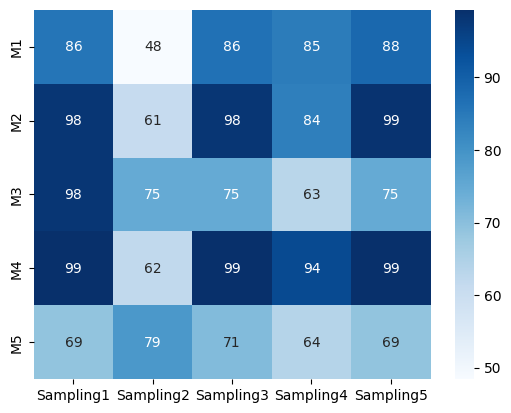

In [20]:
sns.heatmap(results.astype(float), annot=True, cmap='Blues')
plt.show()
